In [1]:
import rioxarray
import pystac

In [8]:
items = pystac.ItemCollection.from_file("search.json")
raster = rioxarray.open_rasterio(items[2].assets["visual"].href)
print(raster)

<xarray.DataArray (band: 3, y: 10980, x: 10980)> Size: 362MB
[361681200 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 88kB 6e+05 6e+05 6e+05 ... 7.098e+05 7.098e+05
  * y            (y) float64 88kB 5.9e+06 5.9e+06 5.9e+06 ... 5.79e+06 5.79e+06
    spatial_ref  int64 8B 0
Attributes:
    OVR_RESAMPLING_ALG:  AVERAGE
    AREA_OR_POINT:       Area
    _FillValue:          0
    scale_factor:        1.0
    add_offset:          0.0


In [9]:
print(raster.shape)

(3, 10980, 10980)


(3, 687, 687)


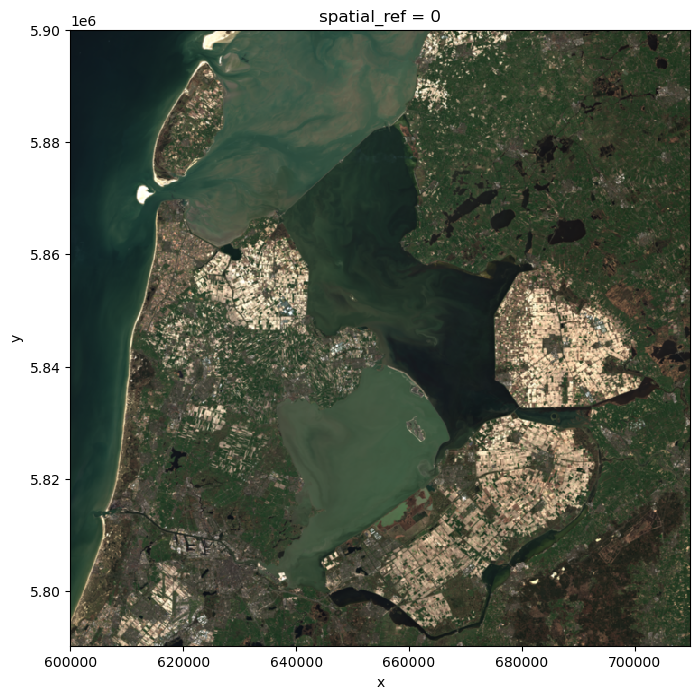

In [7]:
raster_overview = rioxarray.open_rasterio(items[2].assets["visual"].href, overview_level=3)
print(raster_overview.shape)

raster_overview.plot.imshow(figsize=(8,8))

In [10]:
from pyproj import CRS
CRS(raster.rio.crs)

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [19]:
import geopandas as gpd

fields = gpd.read_file("fields_cropped.shp")
fields.crs

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Netherlands - onshore, including Waddenzee, Dutch Wadden Islands and 12-mile offshore coastal zone.
- bounds: (3.2, 50.75, 7.22, 53.7)
Coordinate Operation:
- name: RD New
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [23]:
fields = fields.to_crs(raster.rio.crs)

In [13]:
raster_clip_box = raster.rio.clip_box(*fields.total_bounds)
print(raster_clip_box.shape)

(3, 1574, 1584)


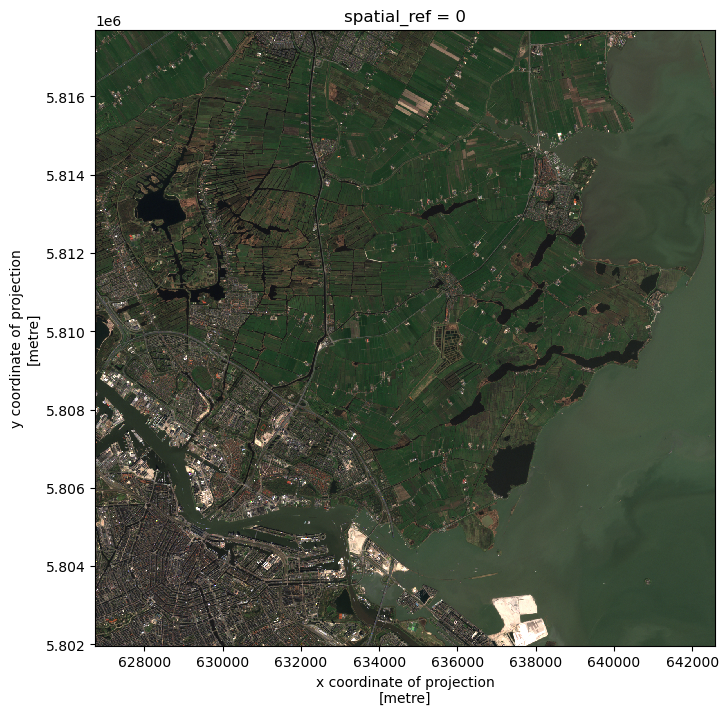

In [14]:
raster_clip_box.plot.imshow(figsize=(8,8))

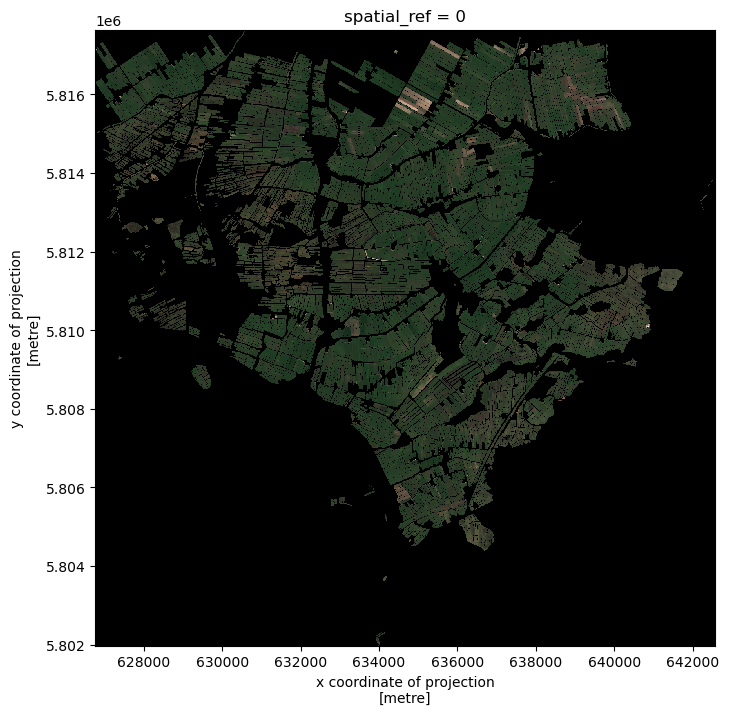

In [15]:
raster_clip_fields = raster_clip_box.rio.clip(fields['geometry'])
raster_clip_fields.plot.imshow(figsize=(8,8))

In [24]:
fields_filter = fields[fields['gewascode'] == 257]
fields_filter

,category,gewas,gewascode,jaar,status,geometry
1561,Bouwland,"Bieten, voeder-",257,2020,Definitief,"POLYGON ((635146.387 5815478.334, 635140.863 5..."
1568,Bouwland,"Bieten, voeder-",257,2020,Definitief,"POLYGON ((634956.946 5815584.796, 634778.695 5..."


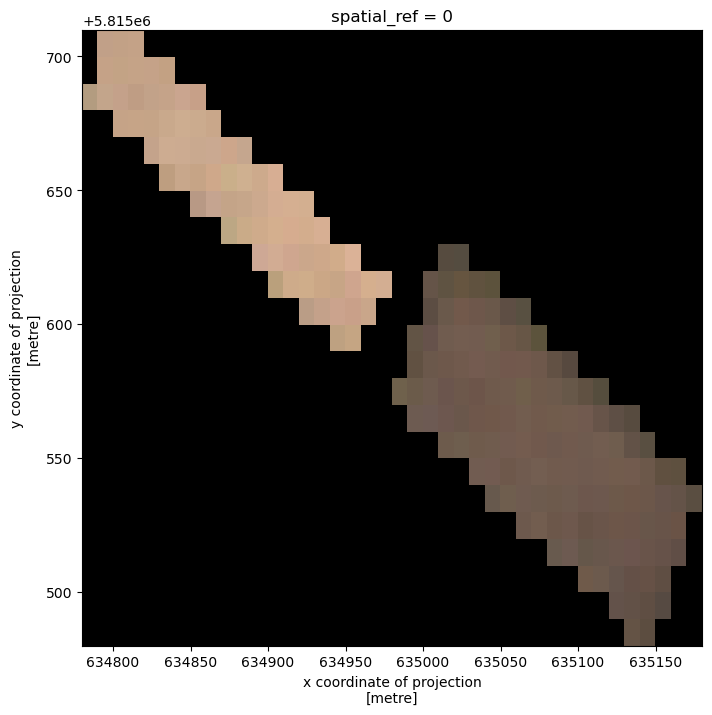

In [25]:
raster_clip_fields_gewascode = raster.rio.clip(fields_filter['geometry'])
raster_clip_fields_gewascode.plot.imshow(figsize=(8,8))

In [26]:
raster_clip_fields_gewascode = raster_clip_fields_gewascode.rio.reproject("EPSG:28992")
CRS(raster_clip_fields_gewascode.rio.crs)

<Projected CRS: EPSG:28992>
Name: Amersfoort / RD New
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Oblique Stereographic
Datum: Amersfoort
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [27]:
CRS(raster_clip_box.rio.crs)

<Projected CRS: EPSG:32631>
Name: WGS 84 / UTM zone 31N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 31N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

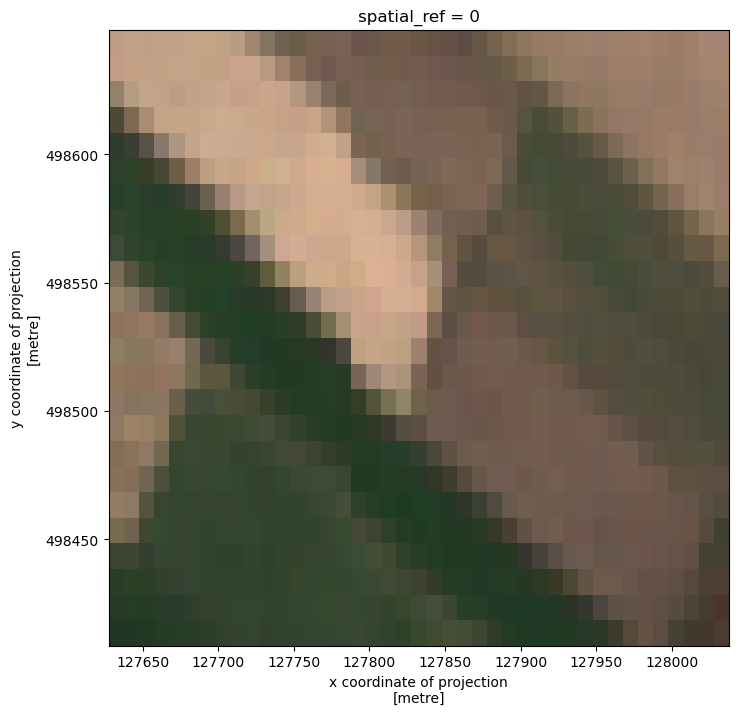

In [28]:
raster_reproject_match = raster_clip_box.rio.reproject_match(raster_clip_fields_gewascode)
raster_reproject_match.plot.imshow(figsize=(8,8))